<a href="https://colab.research.google.com/github/MathiasPascal/75652025_Churning_Customers/blob/main/75652025_Churning_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv', dtype={'Report ID': object})
df.drop('customerID', inplace=True, axis=1)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors ='coerce')

In [4]:
df.head

<bound method NDFrame.head of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL         

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = Imputer.fit_transform(df[['TotalCharges']])

In [8]:
categorical_features= df.select_dtypes(include=['object']).columns
categorical_data = df[categorical_features]
numerical_features= df.select_dtypes(include=['float64', 'int64']).columns
numerical_data = df[numerical_features]

In [9]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_data =categorical_data.apply(lambda col: encoder.fit_transform(col))

In [10]:
data = pd.concat([categorical_data, numerical_data], axis=1)
data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0,24,84.80,1990.50
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0,72,103.20,7362.90
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0,11,29.60,346.45
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1,4,74.40,306.60


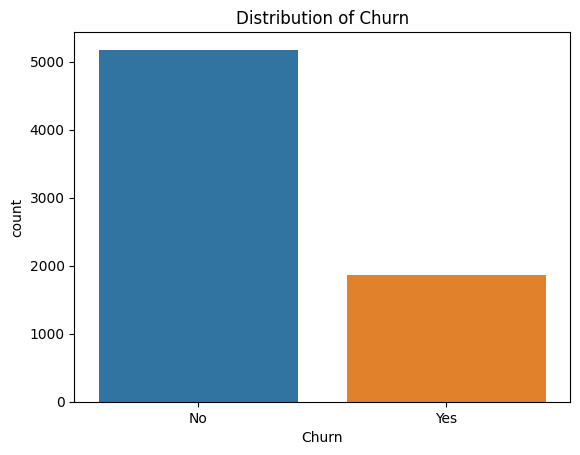

In [11]:
# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

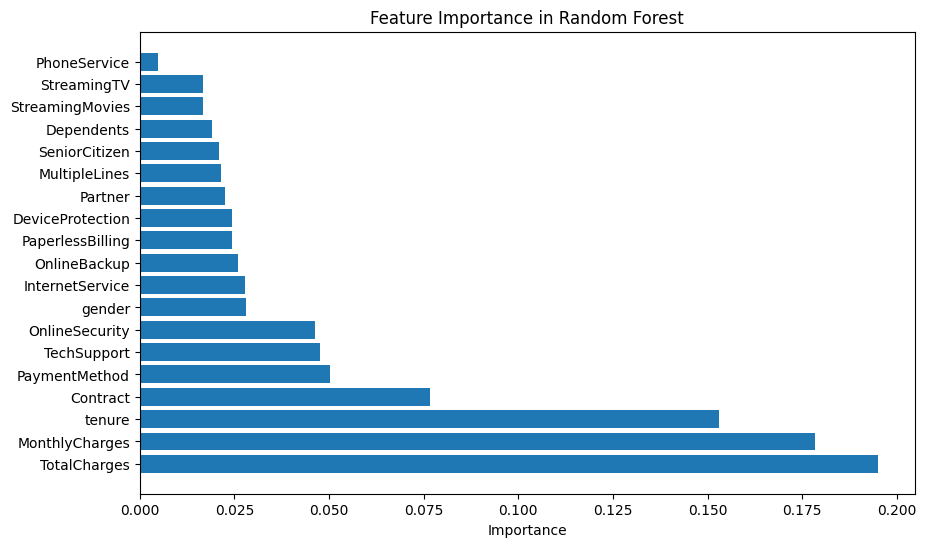

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


In [ ]:
feature_importance_df



In [26]:
selected_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'Churn']

# Create a subframe with selected features
subframe = data[selected_features]

# Display the subframe
print(subframe.head())

   TotalCharges  MonthlyCharges  tenure  Contract  PaymentMethod  Churn
0         29.85           29.85       1         0              2      0
1       1889.50           56.95      34         1              3      0
2        108.15           53.85       2         0              3      1
3       1840.75           42.30      45         1              0      0
4        151.65           70.70       2         0              2      1


In [30]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns for scaling
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Extract categorical columns
categorical_features = ['Contract', 'PaymentMethod']

# Separate numerical and categorical features
numerical_data = subframe[numerical_features]
categorical_data = subframe[categorical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_features)

# Combine scaled numerical features with categorical features
scaled_subframe = pd.concat([scaled_numerical_data, categorical_data], axis=1)

# Display the scaled subframe
scaled_subframe['Churn']= subframe['Churn']
print(scaled_subframe.head())

   TotalCharges  MonthlyCharges    tenure  Contract  PaymentMethod  Churn
0     -0.994971       -1.160323 -1.277445         0              2      0
1     -0.173876       -0.259629  0.066327         1              3      0
2     -0.960399       -0.362660 -1.236724         0              3      1
3     -0.195400       -0.746535  0.514251         1              0      0
4     -0.941193        0.197365 -1.236724         0              2      1


In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is the target variable
X = scaled_subframe.drop('Churn', axis=1)
y = scaled_subframe['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1409, 5)
y_test shape: (1409,)


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# Define the model using Functional API
input_shape = X_train.shape[1]

# Create separate input layers for numerical and categorical features
input_numerical = Input(shape=(input_shape - 2,), name='numerical_input')
input_categorical = Input(shape=(2,), name='categorical_input')  # Assuming 2 categorical features

# Hidden layers for numerical features
hidden_numerical = Dense(64, activation='relu')(input_numerical)
hidden_numerical = Dense(32, activation='relu')(hidden_numerical)

# Concatenate numerical and categorical features
concatenated = concatenate([hidden_numerical, input_categorical])

# Additional hidden layers if needed
hidden_combined = Dense(32, activation='relu')(concatenated)

# Output layer
output = Dense(1, activation='sigmoid', name='output')(hidden_combined)

# Create the model
model = Model(inputs=[input_numerical, input_categorical], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Fit the model to the training data
model.fit(
    {'numerical_input': X_train.iloc[:, :-2], 'categorical_input': X_train.iloc[:, -2:]},
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(
        {'numerical_input': X_test.iloc[:, :-2], 'categorical_input': X_test.iloc[:, -2:]},
        y_test
    )
)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 numerical_input (InputLaye  [(None, 3)]                  0         []                            
 r)                                                                                               
                                                                                                  
 dense_16 (Dense)            (None, 64)                   256       ['numerical_input[0][0]']     
                                                                                                  
 dense_17 (Dense)            (None, 32)                   2080      ['dense_16[0][0]']            
                                                                                                  
 categorical_input (InputLa  [(None, 2)]                  0         []                      

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your model is already trained and stored in the variable 'model'

# Predict on the test set
y_pred_proba = model.predict({'numerical_input': X_test.iloc[:, :-2], 'categorical_input': X_test.iloc[:, -2:]})

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.4f}')


45/45 [==============================] - 0s 2ms/step
Accuracy: 0.8027
AUC Score: 0.8526


In [63]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')
